In [ ]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))

train_data[:, 0] = 2.0 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])

train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

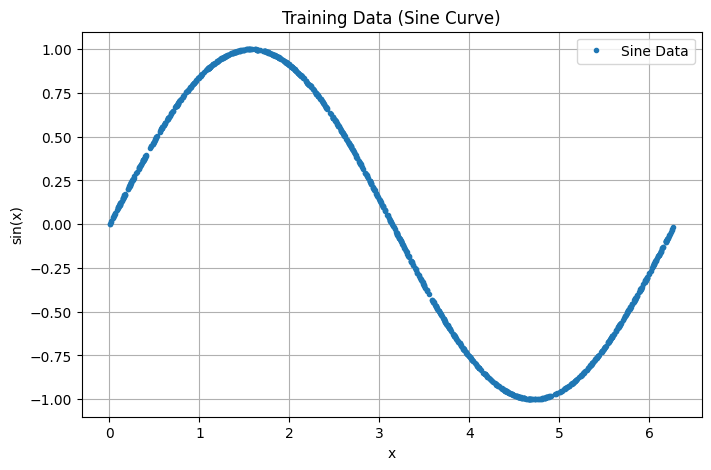

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_data[:, 0], train_data[:, 1], ".", label="Sine Data")
plt.title("Training Data (Sine Curve)")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        return self.model(x)

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 2000
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):

        # === Train Discriminator ===
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))

        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # === Train Generator ===
        latent_space_samples = torch.randn((batch_size, 2))
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)

        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    # Print losses every 200 epochs
    if epoch % 200 == 0:
        print(
            f"Epoch {epoch} | "
            f"Discriminator Loss: {loss_discriminator.item():.4f} | "
            f"Generator Loss: {loss_generator.item():.4f}"
        )

Epoch 0 | Discriminator Loss: 0.1565 | Generator Loss: 2.2985
Epoch 200 | Discriminator Loss: 0.6781 | Generator Loss: 0.7479
Epoch 400 | Discriminator Loss: 0.6626 | Generator Loss: 0.9748
Epoch 600 | Discriminator Loss: 0.6430 | Generator Loss: 0.9279
Epoch 800 | Discriminator Loss: 0.6824 | Generator Loss: 0.7890
Epoch 1000 | Discriminator Loss: 0.6910 | Generator Loss: 0.7275
Epoch 1200 | Discriminator Loss: 0.6566 | Generator Loss: 0.7789
Epoch 1400 | Discriminator Loss: 0.6518 | Generator Loss: 0.8146
Epoch 1600 | Discriminator Loss: 0.6645 | Generator Loss: 0.7265
Epoch 1800 | Discriminator Loss: 0.6840 | Generator Loss: 0.9973


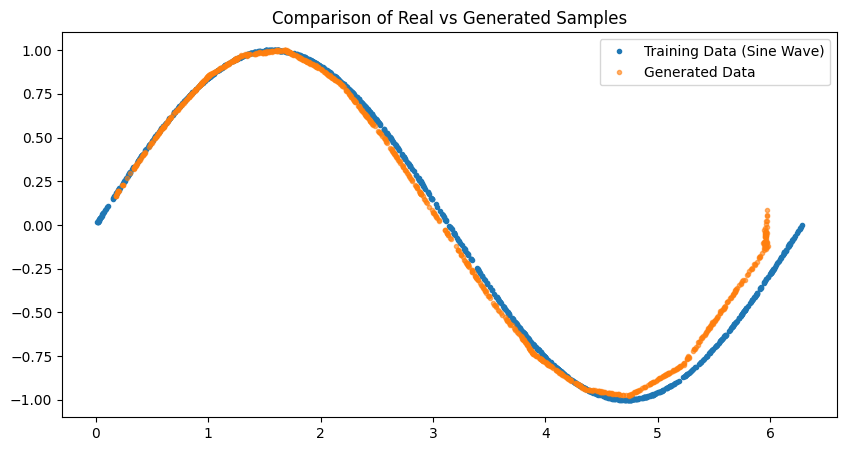

In [ ]:
# Generate samples from the trained generator
latent_space_samples = torch.randn(1000, 2)
generated_samples = generator(latent_space_samples)
generated_samples_numpy = generated_samples.detach().numpy()

# Plot generated samples vs training data
plt.figure(figsize=(10, 5))
plt.plot(train_data[:, 0], train_data[:, 1], ".", label="Training Data (Sine Wave)")
plt.plot(generated_samples_numpy[:, 0], generated_samples_numpy[:, 1], ".", alpha=0.6, label="Generated Data")
plt.legend()
plt.title("Comparison of Real vs Generated Samples")
plt.show()


Create and Train GAN on new 2D distribution using Noisy Parametric Curve

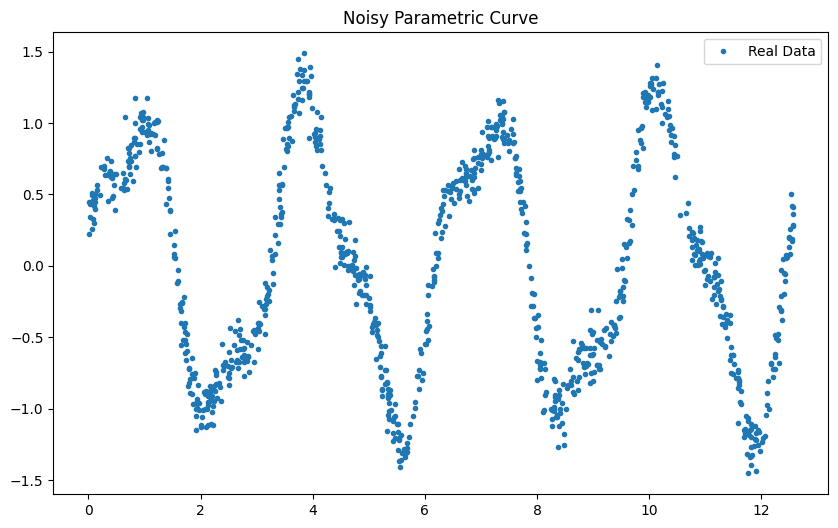

In [ ]:
import numpy as np

# Generate new training data
train_data_length = 1024
x = 4 * math.pi * torch.rand(train_data_length)
epsilon = torch.randn(train_data_length) * 0.1
y = torch.sin(2 * x) + 0.3 * torch.cos(5 * x) + epsilon

train_data = torch.stack((x, y), dim=1)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

# Plot new data
plt.figure(figsize=(10, 6))
plt.plot(train_data[:, 0], train_data[:, 1], ".", label="Real Data")
plt.title("Noisy Parametric Curve")
plt.legend()
plt.show()

# DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)


Normalized Data

In [ ]:
train_data_length = 1024
x = 4 * math.pi * torch.rand(train_data_length)
epsilon = torch.randn(train_data_length) * 0.1
y = torch.sin(2 * x) + 0.3 * torch.cos(5 * x) + epsilon

# Normalize x and y to [-1, 1]
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
x_norm = 2 * (x - x_min) / (x_max - x_min) - 1
y_norm = 2 * (y - y_min) / (y_max - y_min) - 1

train_data = torch.stack((x_norm, y_norm), dim=1)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

In [ ]:
class DiscriminatorModified(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        return self.model(x)

discriminator = DiscriminatorModified()


In [ ]:
class GeneratorImproved(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(64),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 2),
            nn.Tanh()  # Ensures outputs are in [-1, 1]
        )

    def forward(self, x):
        return self.model(x)

generator = GeneratorImproved()



In [ ]:
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=0.001)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=0.001)

In [ ]:
num_epochs = 2000
batch_size = 32

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        latent_space_samples = torch.randn((batch_size, 2))
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Loss D: {loss_discriminator.item():.4f} | Loss G: {loss_generator.item():.4f}")


Epoch 0 | Loss D: 0.5977 | Loss G: 0.9351
Epoch 200 | Loss D: 0.7158 | Loss G: 0.7975
Epoch 400 | Loss D: 0.6320 | Loss G: 0.7585
Epoch 600 | Loss D: 0.6408 | Loss G: 0.9505
Epoch 800 | Loss D: 0.6696 | Loss G: 0.7636
Epoch 1000 | Loss D: 0.6719 | Loss G: 0.8049
Epoch 1200 | Loss D: 0.6687 | Loss G: 0.7074
Epoch 1400 | Loss D: 0.6103 | Loss G: 0.9176
Epoch 1600 | Loss D: 0.6167 | Loss G: 0.8747
Epoch 1800 | Loss D: 0.6400 | Loss G: 0.9646


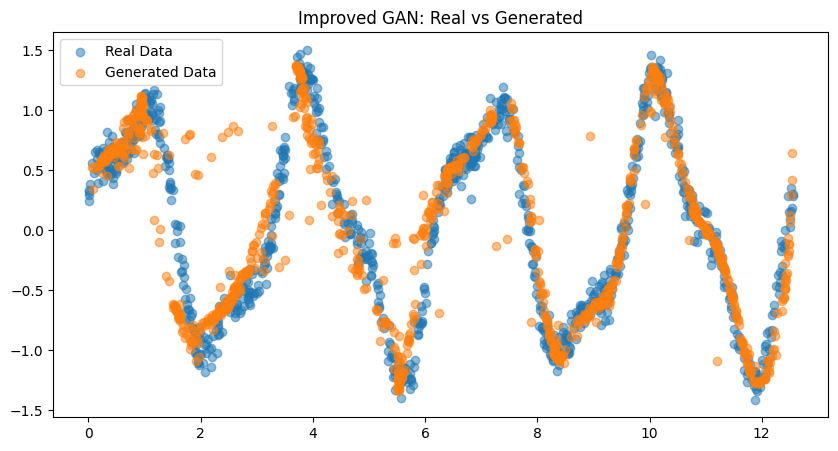

In [ ]:
# After training, generate samples
latent_space_samples = torch.randn(1000, 2)
generated_samples = generator(latent_space_samples).detach()

# Denormalize output for plotting
generated_samples_denorm = generated_samples.clone()
generated_samples_denorm[:, 0] = 0.5 * (generated_samples[:, 0] + 1) * (x_max - x_min) + x_min
generated_samples_denorm[:, 1] = 0.5 * (generated_samples[:, 1] + 1) * (y_max - y_min) + y_min
generated_samples_numpy = generated_samples_denorm.numpy()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(x.numpy(), y.numpy(), label="Real Data", alpha=0.5)
plt.scatter(generated_samples_numpy[:, 0], generated_samples_numpy[:, 1], label="Generated Data", alpha=0.5)
plt.title("Improved GAN: Real vs Generated")
plt.legend()
plt.show()
